# Logistic Regression

## Part 1 - Data Preprocessing

### 1. Importing and Loading the Dataset

In [92]:
import pandas as pd
dataset = pd.read_csv('data.csv')

In [93]:
data_filled = dataset.copy()

### 2. Handling Missing Values

#### Numeric Columns

In [94]:
data_filled.iloc[:, 1:4] = dataset.iloc[:, 1:4].fillna(dataset.iloc[:, 1:4].mean())

#### Categorical Column

In [95]:
data_filled['Was your order accurate? Please respond yes or no.'] = \
    dataset['Was your order accurate? Please respond yes or no.'].fillna(
        dataset['Was your order accurate? Please respond yes or no.'].mode()[0]
    )

### 3. Verification of Missing Data

In [96]:
print(data_filled.isna().sum())

Customer                                                                                                                                                      0
How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      0
How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied     0
How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    0
Was your order accurate? Please respond yes or no.                                                                                                            0
dtype: int64


### 4. Encoding the target column as binary values

In [97]:
data_filled['Was your order accurate? Please respond yes or no.'] = \
    data_filled['Was your order accurate? Please respond yes or no.'].map({'Yes': 1, 'No': 0})

### 5. Preview Data

In [98]:
data_filled.head(10)

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,1
1,2,3.0,4.0,3.0,1
2,3,4.0,5.0,2.0,1
3,4,5.0,3.0,4.0,1
4,5,2.0,5.0,1.0,1
5,6,5.0,2.0,5.0,1
6,7,1.0,4.0,3.0,1
7,8,3.0,3.0,2.0,0
8,9,5.0,1.0,3.0,1
9,10,3.0,5.0,3.0,0


### 6. Check Data Info

In [99]:
data_filled.info

<bound method DataFrame.info of        Customer  \
0             1   
1             2   
2             3   
3             4   
4             5   
...         ...   
10611     10612   
10612     10613   
10613     10614   
10614     10615   
10615     10616   

       How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                    5.0                                                                                                          
1                                                    3.0                                                                                                          
2                                                    4.0                                                                                                          
3                                                    5.0                               

### 7. Getting the inputs and output

In [100]:
X = data_filled.iloc[:, 1:-1].values
y = data_filled.iloc[:, -1].values

### 8. Class Distribution Check

In [101]:
class_counts = data_filled['Was your order accurate? Please respond yes or no.'].value_counts()
print(f"Class distribution:\n{class_counts}\n")

Class distribution:
Was your order accurate? Please respond yes or no.
1    7771
0    2845
Name: count, dtype: int64



### 9. Data Splitting and Resampling

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"New class distribution after SMOTE:\n{pd.Series(y_train_res).value_counts()}\n")

New class distribution after SMOTE:
1    5440
0    5440
Name: count, dtype: int64



## Part 2 - Building and Training the Model 

### 1. Logistic Regression Model Initialization

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

### 2. Model Training

In [104]:
model.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

## Part 3 - Evaluating the Model

### 1. Generate Predictions and Classification Report

In [105]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.53      0.37       854
           1       0.75      0.50      0.60      2331

    accuracy                           0.51      3185
   macro avg       0.51      0.52      0.49      3185
weighted avg       0.62      0.51      0.54      3185



### 2. Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 456,  398],
       [1156, 1175]])

#### Confusion Matrix (Visualization)

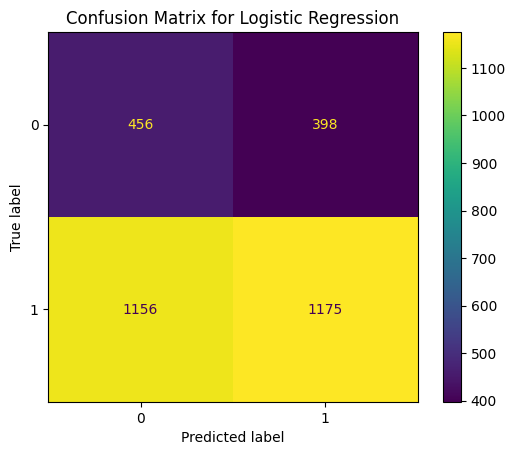

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### 3. Accuracy Calculation

#### Manual Calculation

In [108]:
(456+1175)/(456+1175+398+1156)

0.512087912087912

#### Alternative Calculation (accuracy_score)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.512087912087912